<a href="https://colab.research.google.com/github/gsiahaan/data_manipulation_pandas/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Load Dataset as Time Series***

Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.

Basic format datetime menurut ISO 8601: YYYY-mm-dd HH:MM:SS.

 

Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 

 

[1] read_csv, terdapat keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime tersebut akan transform as datetime Pandas dan menjadi index.

In [1]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

***Convert to Datetime***

Jika dataset yang telah terlebih dahulu atau telah terlanjur di load dengan pd.read_csv dan Pandas salah mengenali object datetime menjadi object string, maka dapat mengubah kolom tertentu dari dataset tersebut menjadi format datetime.

 

[2] pd.to_datetime digunakan untuk men-transform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. Mari perhatikan kembali contoh berikut:

In [2]:
gaq2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq2.head())
# Ubah menjadi datetime
gaq2['timestamp'] = pd.to_datetime(gaq2['timestamp'])
gaq2 = gaq2.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq2.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

***Resampling untuk Time Series Data***

Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

[1] Downsampling

Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit

Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

 

[2] Upsampling

Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail

Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

 

Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc).

 

Tabel resampling untuk time series:
Input                     Description

'Min', 'T'                  minute

'H'                         hour
'D'                         day

'B'                         Business day
'W'                         week
'M'                         month
'Q'                         quarter
'A'                         year

***Downsampling***

Shorten data to weekly and quarterly, like Trading Shares.

In [3]:
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head())

Downsampling daily to weekly - max (5 teratas):
                           country pollutant  value   unit source_name  \
timestamp                                                               
2014-05-18 00:00:00+00:00      PH      pm25    9.7  µg/m³     Spartan   
2014-05-25 00:00:00+00:00     NaN       NaN    NaN    NaN         NaN   
2014-06-01 00:00:00+00:00     NaN       NaN    NaN    NaN         NaN   
2014-06-08 00:00:00+00:00     NaN       NaN    NaN    NaN         NaN   
2014-06-15 00:00:00+00:00     NaN       NaN    NaN    NaN         NaN   

                           latitude  longitude  averaged_over_in_hours  
timestamp                                                               
2014-05-18 00:00:00+00:00    14.635     121.08                     1.0  
2014-05-25 00:00:00+00:00       NaN        NaN                     NaN  
2014-06-01 00:00:00+00:00       NaN        NaN                     NaN  
2014-06-08 00:00:00+00:00       NaN        NaN                     NaN  
2

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  return f(*args, **kwargs)


***Upsampling***


In [5]:
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Upsampling daily to hourly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 05:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 06:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 07:00:00+00:00    NaN       NaN        NaN                     NaN


***Resampling by Frequency***

Pada bagian ini akan mempelajari bagaimanakah caranya me-resampling data (baik upsampling atau downsampling) berdasarkan frekuensi, misalnya sekali 2 minggu, tiap 12 jam, dsb.

In [6]:
gaq2_2monthly = gaq2.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq2_2monthly.head())

Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


***VISUALISASI***

Selanjutnya untuk memvisualisasikan dengan menggunakan library matplotlib dataframe yang telah diolah 

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


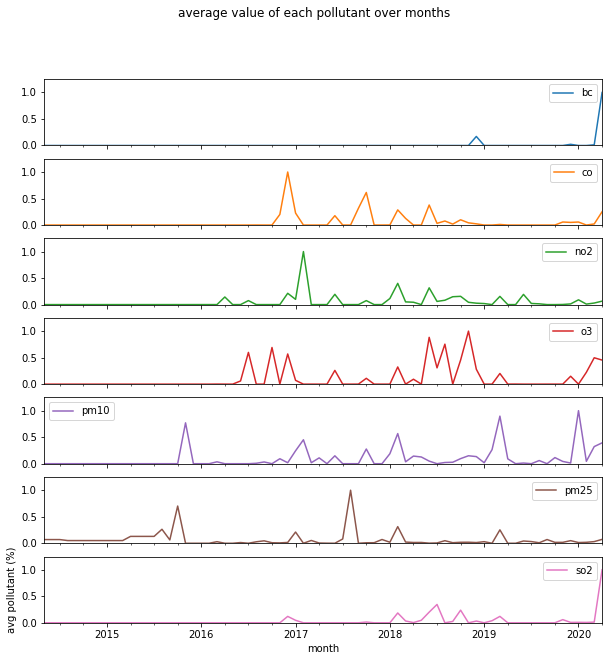

In [7]:
import matplotlib.pyplot as plt
gaq_viz = gaq2[['pollutant', 'value']].reset_index().set_index(['timestamp', 'pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant',aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10, 10), #ukuran canvas 10px x 10px
   ylim = (0, 1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()